### Mean

    Tean = Total / No of outcomes(n)




In [147]:
def mean(nums):
    total = sum(nums)
    n = len(nums)
    mean = total / n
    return mean

In [148]:
def variance(nums, mean) -> float:
    x = 0
    for i in range(0, len(nums)):
        x += pow((nums[i] - mean), 2)
    return x

In [149]:
def cov(listx, listy):
    print('hello',listx)
    mean_1 = mean(listx)
    mean_2 = mean(listy)
    size = len(listx)
    covariance = 0.0
    for i in range(0, size):
        covariance += (listx[i] - mean_1) * (listy[i] - mean_2)
    return covariance

In [150]:
def ssxreg(b1, sxx):
    return (b1 ** 2) * sxx

In [151]:
def slope(x_list, y_list):
    y_mean = mean(y_list)
    x_mean = mean(x_list)
    covariance = cov(x_list, y_list)
    var = variance(y_list, y_mean)
   
    print('Cov', covariance)
    print('Var', var)

    b1 = covariance / var
    bo = x_mean - (b1 * y_mean)
    sreg = ssxreg(b1, var)
    stot = variance(x_list, x_mean)
    sreg = round(sreg)
    stot = round(stot)
    r2 = sreg / stot
    print('Anova Table')
    print('SS reg ', sreg)
    print('SS total ', stot)
    print('R-square ', r2)
    print('b0 ', bo)
    print('b1 ', b1)

    return b1, bo

### Graph

In [152]:
import matplotlib.pyplot as plt
import pandas as pd
def plot_data(x, y, xfit, predX, predY, figname):
    plt.figure(dpi=120)
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.scatter(x, y)
    plt.scatter(predX, predY, color='red')
    plt.plot(x, xfit, color= 'black')
    plt.savefig('./figs/'+figname, dpi=800)
    plt.show()


### Prediction


In [153]:
def predict(dataset, years, libname):
    x_list = dataset['population']
    y_list = dataset['year']
    b1, b0 = slope(x_list, y_list)
    df_ylist = pd.DataFrame(y_list)
    df_xlist = pd.DataFrame(x_list)
    predX = []
    predY = []

    predDf = pd.DataFrame()
    for year in years:
        df_ylist = df_ylist.append({'year': int(year)}, ignore_index=True)

        pred = b0 + b1 * year
        df_xlist = df_xlist.append({'population': pred}, ignore_index=True)
        predX.append(pred)
        predY.append(year)
    predDf['year'] =  pd.DataFrame(predY,columns=['year'])
    predDf['prediction'] =  pd.DataFrame(predX,columns=['prediction'])
    xfit= [b0 + (b1 * year) for year in df_ylist['year']]
    print(predDf)
    plot_data(df_ylist['year'], df_xlist['population'], xfit, predY, predX, libname+'.jpg')
    return predDf

### Read dataset

    

Book Example

hello 0     2558
1     2782
2     3043
3     3350
4     3712
5     4089
6     4451
7     4855
8     5287
9     5700
10    6090
11    6474
12    6864
Name: population, dtype: int64
Cov 337250.0
Var 4550.0
Anova Table
SS reg  24997266
SS total  25115321
R-square  0.995299482734065
b0  -142201.26373626373
b1  74.12087912087912
   year    prediction
0  1950   2334.450549
1  2100  13452.582418


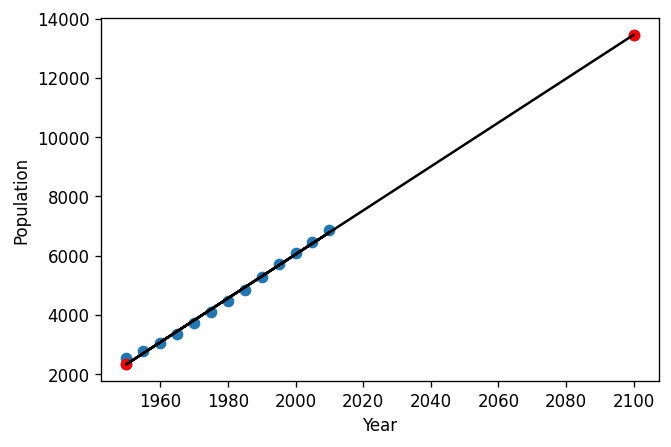

   year    prediction
0  1950   2334.450549
1  2100  13452.582418


In [154]:
population_book_sum = pd.read_csv('population.csv')
years = [1950, 2100]
predDf = predict(population_book_sum, years, 'OutputUS')
print(predDf)

Indian Population

hello 0     1393409038
1     1380004385
2     1366417754
3     1352642280
4     1338676785
         ...    
67     402578596
68     395544369
69     388799073
70     382376948
71     376325200
Name: population, Length: 72, dtype: int64
Cov 479202511217.5
Var 31098.0
Anova Table
SS reg  7384238431962126336
SS total  7469732431821099008
R-square  0.9885546101363996
b0  -29766509490.770878
b1  15409431.835407421
   year    prediction
0  2021  1.375952e+09
1  2022  1.391362e+09


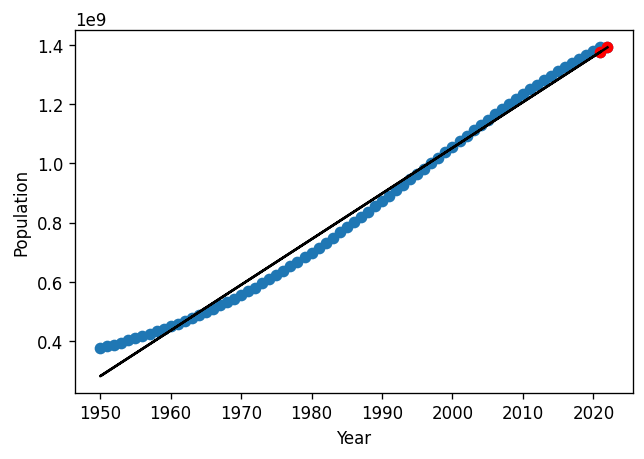

   year    prediction
0  2021  1.375952e+09
1  2022  1.391362e+09


In [155]:
dataUS = pd.read_csv('IndiaPopulation.csv')
years = [2021, 2022]
predDf = predict(dataUS, years, 'OutputUS')
print(predDf)